In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
(a,b),(c,d) = cifar10.load_data()

170500096/170498071 [==============================] - 305s 2us/step


In [4]:
print(a.shape,c.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 24s 2us/step


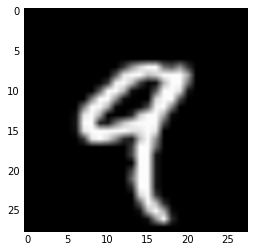

In [9]:
plt.imshow(X_train[4].reshape(28,28),cmap="gray")

In [10]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [11]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(60000,784).astype('float32')

In [12]:
X_test = X_test.reshape(10000,784).astype('float32')
print(X_train.shape,X_test.shape)


(60000, 784) (10000, 784)


In [13]:
print(X_train[4])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)



10


In [16]:
model = Sequential()
model.add(Dense(612,activation="relu",input_shape=(784,)))
model.add(Dense(10,activation="softmax"))


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 612)               480420    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6130      
Total params: 486,550
Trainable params: 486,550
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
model.fit(X_train, y_train,epochs=10, batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0407 - acc: 0.9882
Epoch 2/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0313 - acc: 0.9918
Epoch 3/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0233 - acc: 0.9937
Epoch 4/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0184 - acc: 0.9954
Epoch 5/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0137 - acc: 0.9969
Epoch 6/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0106 - acc: 0.9978
Epoch 7/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0089 - acc: 0.9982
Epoch 8/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0065 - acc: 0.9989
Epoch 9/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0051 - acc: 0.9992
Epoch 10/10
60000/60000 [==============================] - 20s 339us/step - loss: 

In [21]:


loss,accuracy = model.evaluate(X_test,y_test)
print(loss,accuracy)



10000/10000 [==============================] - 2s 191us/step
0.06530237912101584 0.9814


In [24]:
import random
rand = random.randint(1,10000)
print(rand)

7693


[0] [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


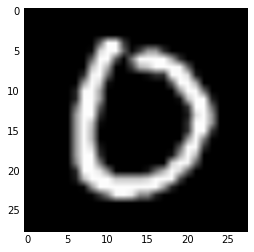

In [25]:
prediction_real=model.predict_classes(X_test[rand:rand+1])
print(prediction_real,y_test[rand:rand+1])
plt.imshow(X_test[rand:rand+1].reshape(28,28),cmap="gray")